In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report


In [ ]:
#LOADING DATASET
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

df = pd.concat([X, y], axis=1)


In [ ]:
#DATASET SHAPE
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])



Rows: 569
Columns: 31


In [ ]:
#DATASET TYPES AND MISSING VALUES
print(df.dtypes)
print(df.isnull().sum())


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [ ]:
#STASTICAL SUMMARY 
df.describe().T.head()


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


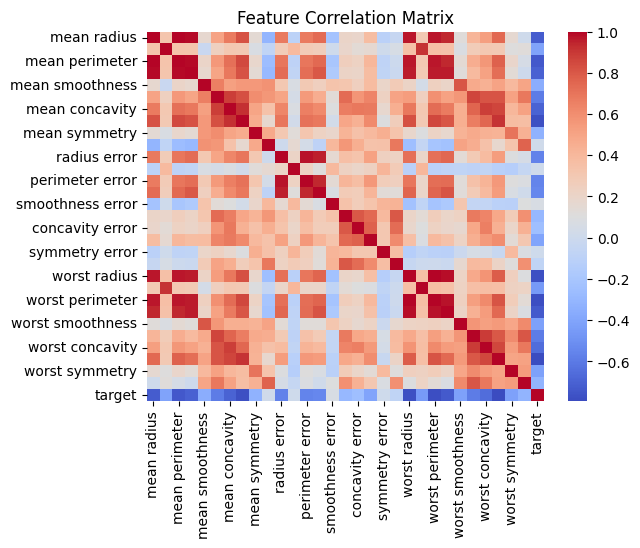

In [ ]:
#CORRELATION
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
#TRAINING TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
#LOGISTIC REGRESSION
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=500))
])

param_lr = {'lr__C': [0.01, 0.1, 1, 10]}

grid_lr = GridSearchCV(pipe_lr, param_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_


In [ ]:
#DECISION TREE
dt = DecisionTreeClassifier(random_state=42)

param_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_


In [ ]:
#RANDOM FOREST
rf = RandomForestClassifier(random_state=42)

param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}

grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


In [ ]:
#EVALUATION FUNCTION
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


In [ ]:
#EVALUATION
evaluate(best_lr, X_test, y_test, "Logistic Regression")
evaluate(best_dt, X_test, y_test, "Decision Tree")
evaluate(best_rf, X_test, y_test, "Random Forest")



--- Logistic Regression ---
Accuracy: 0.9736842105263158
Precision: 0.9726027397260274
Recall: 0.9861111111111112
ROC-AUC: 0.9957010582010581

--- Decision Tree ---
Accuracy: 0.9122807017543859
Precision: 0.9428571428571428
Recall: 0.9166666666666666
ROC-AUC: 0.9141865079365079

--- Random Forest ---
Accuracy: 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
ROC-AUC: 0.9933862433862434
